In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore
from math import log10

from collections import Counter

In [17]:
### Load data

metabolite_array = pd.read_csv("../MCF7_removal/Metabolomics_data_noMCF7.csv")
metabolite_array = metabolite_array.set_index("ionIdx")
metabolite_array = metabolite_array.drop("ionMz", axis =1)

In [18]:
metabolite_array

,1,2,3,4,5,6,7,8,9,10,...,1287,1288,1289,1290,1291,1292,1293,1294,1295,1296
ionIdx,,,,,,,,,,,,,,,,,,,,,
1,10755,9608,9434,9720,8356,7814,8998,9164,6230,7931,...,6566,5004,6202,7946,5711,10677,6683,6125,5018,5627
2,3507,3938,3836,4311,4534,7250,2338,3386,1506,2998,...,1463,1281,2111,382,2691,1474,757,1059,2668,2061
3,61335,64959,78616,78619,58873,64141,61454,62215,42346,47793,...,33828,30939,41765,43246,33936,27913,22271,31315,67741,68680
4,4178,4586,5914,4963,4268,5809,3971,6174,4275,5218,...,4638,3525,3418,5450,4165,2648,7556,5147,5106,7744
5,4124,6969,11827,11233,3640,4308,5750,6529,4072,5716,...,2812,3423,1506,2841,2529,2642,2598,1084,3020,2301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,2752,2993,1722,2304,2587,3685,6248,5451,3976,3969,...,1362,1450,3704,3702,3075,3057,3320,3018,1607,1351
1096,-286,-355,-348,167,-326,-357,557,814,683,380,...,677,979,1280,1354,524,182,1359,867,1535,1540
1097,1574,1171,1039,576,1868,1414,2668,1465,2089,1456,...,52,173,379,581,876,1130,181,288,204,164


In [20]:
sample_data = pd.read_csv("../MCF7_removal/Celllines_mapping_manual_noMCF7.csv")
sample_data = sample_data.drop_duplicates(subset = "dsIdx")
celllines = sample_data["ID"]

In [21]:
metabolite_array.columns = celllines

In [22]:
metabolite_array

ID,SHP-77,SHP-77,PC-9,PC-9,SHP-77,SHP-77,LUDLU-1,LUDLU-1,PC14PE6,PC14PE6,...,UO-31,UO-31,K-562,K-562,EKVX,EKVX,DU4475,DU4475,SF539,SF539
ionIdx,,,,,,,,,,,,,,,,,,,,,
1,10755,9608,9434,9720,8356,7814,8998,9164,6230,7931,...,6566,5004,6202,7946,5711,10677,6683,6125,5018,5627
2,3507,3938,3836,4311,4534,7250,2338,3386,1506,2998,...,1463,1281,2111,382,2691,1474,757,1059,2668,2061
3,61335,64959,78616,78619,58873,64141,61454,62215,42346,47793,...,33828,30939,41765,43246,33936,27913,22271,31315,67741,68680
4,4178,4586,5914,4963,4268,5809,3971,6174,4275,5218,...,4638,3525,3418,5450,4165,2648,7556,5147,5106,7744
5,4124,6969,11827,11233,3640,4308,5750,6529,4072,5716,...,2812,3423,1506,2841,2529,2642,2598,1084,3020,2301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,2752,2993,1722,2304,2587,3685,6248,5451,3976,3969,...,1362,1450,3704,3702,3075,3057,3320,3018,1607,1351
1096,-286,-355,-348,167,-326,-357,557,814,683,380,...,677,979,1280,1354,524,182,1359,867,1535,1540
1097,1574,1171,1039,576,1868,1414,2668,1465,2089,1456,...,52,173,379,581,876,1130,181,288,204,164


In [24]:
average = metabolite_array.mean(axis=1, level=0)

<ipython-input-24-0d7c2652d8aa>:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  average = metabolite_array.mean(axis=1, level=0)


In [25]:
average

ID,SHP-77,PC-9,LUDLU-1,PC14PE6,NCI-H446,Malme-3M,NCI-H1755,NCI-H2135,HCC1187,COR-L88,...,NCI-H146,HL-60,NCI-H82,SF268,SF539,CCRF-CEM,K-562,DU4475,UO-31,EKVX
ionIdx,,,,,,,,,,,,,,,,,,,,,
1,8465.333333,9022.333333,8837.75,7749.833333,9303.2,8096.666667,9522.833333,9311.833333,10228.5,7732.750000,...,8740.333333,6372.666667,7893.000000,6933.333333,6384.333333,7557.833333,8142.166667,7113.666667,7287.666667,7237.500000
2,4044.666667,4554.500000,2194.00,2352.666667,5165.7,1998.833333,2083.500000,4409.666667,3315.6,5039.000000,...,3292.833333,1815.833333,1601.000000,2503.833333,1782.333333,1780.000000,1496.666667,859.833333,2329.666667,2441.166667
3,64033.500000,83264.666667,62600.00,51762.333333,82707.7,64092.500000,80059.500000,109218.500000,98461.9,57604.833333,...,38132.333333,40767.333333,38523.500000,65668.333333,76605.666667,53527.333333,42010.500000,35301.666667,35755.333333,49048.666667
4,4723.000000,5952.500000,4993.75,4581.333333,5605.3,4952.000000,5956.500000,6275.166667,6132.9,4296.750000,...,4892.166667,4106.000000,3986.833333,5752.666667,6547.166667,5084.666667,4754.833333,5805.333333,4156.666667,4145.833333
5,4695.166667,9180.833333,5782.25,5874.000000,4996.0,4073.333333,5541.000000,5095.666667,5776.9,5652.500000,...,3167.666667,3275.666667,3918.500000,3891.500000,3358.666667,5203.666667,3115.833333,2953.000000,3919.166667,3034.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,2930.000000,2542.000000,5661.75,3271.666667,3697.1,4537.000000,2824.666667,2506.500000,2943.1,2508.500000,...,3389.666667,1732.333333,3628.833333,1996.166667,1661.833333,1680.333333,3609.333333,3260.000000,1794.000000,3022.666667
1096,-337.166667,-42.166667,675.25,527.000000,453.1,597.500000,482.000000,612.666667,496.0,-52.250000,...,2042.833333,1868.166667,2737.833333,230.166667,1751.333333,2548.000000,1441.833333,1126.666667,894.833333,87.666667
1097,1532.666667,1109.166667,2173.25,1529.333333,1179.9,922.833333,1642.333333,685.000000,725.0,1635.666667,...,851.500000,378.000000,196.500000,603.000000,152.500000,189.166667,397.333333,252.500000,218.166667,978.333333


In [51]:
tissue_list = []
for item in average.columns:
    tissue = sample_data[sample_data["ID"] == item]["Tissue"].iloc[0]
    tissue_list.append(tissue)

In [68]:
tissue_list = pd.Series(tissue_list)
tissue_list = tissue_list.rename("Tissue")

In [53]:
### Set up tissue labels

sample_data = pd.read_csv("../MCF7_removal/Celllines_mapping_manual_noMCF7.csv")
sample_data = sample_data.drop_duplicates(subset = "dsIdx")
sample_data_tissue = sample_data["DI"].tolist()
tissue_type = []

unknown_list = []
unknown_count =1

for item in sample_data_tissue:
    if pd.isnull(item):
        unknown_list.append(str(unknown_count))
        unknown_count +=1
        continue
        
    elif item == "[]":
        unknown_list.append(str(unknown_count))
        unknown_count+=1
        continue
    else:
        item = item.split(";")[2].split("'")[0].strip()
        tissue_type.append(item)
        unknown_count+=1
    tissue_origin = pd.read_excel("../../Cellosaurus_data/Cellline_tissue_origin.xlsx", names= ["Cancer", "Origin", "Layer1", "Layer2"])
tissue_origin_dict = tissue_origin.set_index("Cancer")["Origin"].to_dict()
cell_origin = [tissue_origin_dict.get(item) for item in tissue_type]
tissue_type = pd.Series(tissue_type)
cell_origin = pd.Series(cell_origin)
tissue_type = tissue_type.rename("Tissue")
cell_origin = cell_origin.rename("Tissue")

In [75]:
### Make palettes

manual_palette = sns.color_palette("Set3").as_hex()[4:-1] + sns.color_palette("Set3").as_hex()[:4] + (sns.color_palette("Set2").as_hex())
manual_combined = sns.color_palette(manual_palette, n_colors = len(Counter(cell_origin))+1).as_hex()
palette_cmap = sns.diverging_palette(237, 8.7, s= 99, l = 50, as_cmap = True)

In [76]:
c1 = manual_combined[1]
c2 = manual_combined[2]

manual_combined[1] = c2
manual_combined[2] = c1

In [77]:
manual_combined

['#80b1d3',
 '#b3de69',
 '#fdb462',
 '#fccde5',
 '#d9d9d9',
 '#bc80bd',
 '#ccebc5',
 '#8dd3c7',
 '#ffffb3',
 '#bebada',
 '#fb8072',
 '#66c2a5']

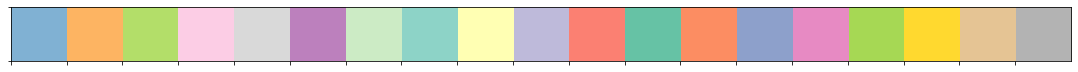

In [78]:
sns.palplot(manual_palette)

In [79]:
reordered_cells = ['Lung', 'Skin', 'Breast', 'Brain', 'Ovary', 'Blood', 'Colon',
       'Kidney', 'Pancreas', 'Prostate', 'Bladder', "Unknown"]

In [80]:
palette  = dict(zip(reordered_cells, manual_combined))
tissue_colours = tissue_list.map(palette)

In [81]:
palette

{'Lung': '#80b1d3',
 'Skin': '#b3de69',
 'Breast': '#fdb462',
 'Brain': '#fccde5',
 'Ovary': '#d9d9d9',
 'Blood': '#bc80bd',
 'Colon': '#ccebc5',
 'Kidney': '#8dd3c7',
 'Pancreas': '#ffffb3',
 'Prostate': '#bebada',
 'Bladder': '#fb8072',
 'Unknown': '#66c2a5'}

In [82]:
#metabolite_array = metabolite_array.drop(["ionIdx", "ionMz"], axis = 1)
#metabolite_array = metabolite_array.drop(unknown_list, axis =1)

In [83]:
metabolite_array = np.log10(average)
metabolite_array = metabolite_array.fillna(0)
metabolite_array = metabolite_array.replace(np.inf, 0)
metabolite_array = metabolite_array.replace(-np.inf, 0)

In [84]:
metabolite_array_colz = (metabolite_array.transpose().apply(zscore, axis =0)).transpose()
metabolite_array_rowz = metabolite_array.apply(zscore, axis = 0)

In [85]:
tissue_colours

0      #80b1d3
1      #80b1d3
2      #80b1d3
3      #80b1d3
4      #80b1d3
        ...   
168    #bc80bd
169    #bc80bd
170    #fdb462
171    #8dd3c7
172    #80b1d3
Name: Tissue, Length: 173, dtype: object

[]

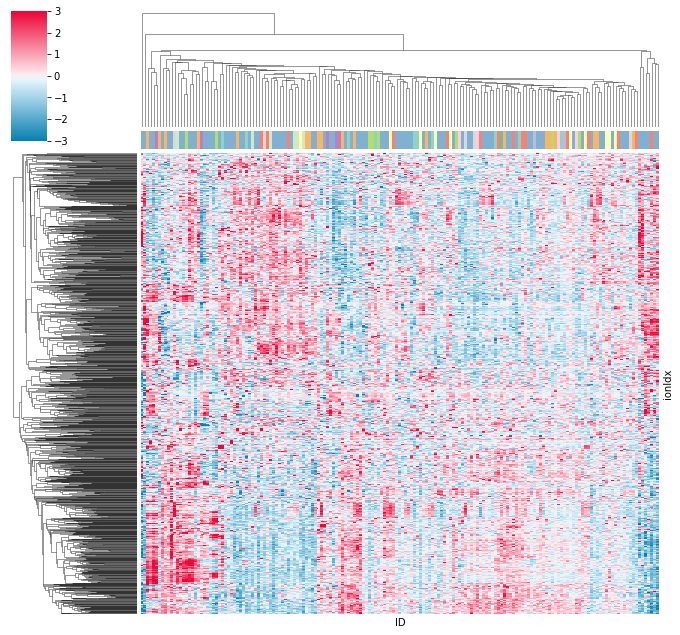

In [86]:
g = sns.clustermap(metabolite_array_colz, vmax = 3, vmin = -3, cmap = palette_cmap, col_colors=tissue_colours.values)
g.ax_heatmap.set_xticklabels([])
g.ax_heatmap.set_xticks([])

g.ax_heatmap.set_yticklabels([])
g.ax_heatmap.set_yticks([])

#g.savefig("Metabolite_expression_clustermap.png", dpi = 450)

In [87]:
columnorder = g.dendrogram_col.reordered_ind

In [88]:
for item in columnorder:
    print(str(item) + ",")

7,
80,
170,
163,
165,
169,
77,
72,
67,
83,
149,
87,
55,
6,
2,
5,
3,
4,
1,
8,
21,
11,
19,
51,
50,
53,
131,
138,
69,
20,
39,
40,
57,
9,
61,
111,
68,
139,
159,
81,
104,
17,
108,
24,
27,
54,
12,
172,
28,
119,
143,
150,
157,
38,
160,
65,
73,
135,
152,
59,
63,
64,
164,
56,
10,
26,
168,
93,
142,
171,
70,
95,
62,
129,
79,
78,
42,
49,
102,
122,
74,
132,
123,
116,
118,
92,
98,
71,
75,
109,
141,
107,
125,
147,
32,
144,
127,
161,
154,
110,
114,
128,
76,
85,
105,
126,
13,
14,
136,
91,
113,
88,
167,
117,
94,
100,
45,
124,
41,
48,
146,
46,
151,
156,
44,
22,
36,
58,
134,
86,
15,
101,
99,
148,
130,
16,
34,
30,
18,
166,
29,
43,
153,
33,
89,
37,
90,
103,
106,
115,
112,
31,
60,
155,
133,
47,
97,
137,
120,
140,
35,
66,
145,
84,
25,
121,
0,
23,
52,
162,
158,
82,
96,


In [89]:
tissue_ordered_list = [cell_origin[i] for i in columnorder]

In [90]:
tissue_ordered_list

['Lung',
 'Ovary',
 'Lung',
 'Lung',
 'Lung',
 'Lung',
 'Breast',
 'Lung',
 'Brain',
 'Breast',
 'Lung',
 'Lung',
 'Lung',
 'Lung',
 'Lung',
 'Lung',
 'Lung',
 'Lung',
 'Lung',
 'Lung',
 'Skin',
 'Lung',
 'Lung',
 'Breast',
 'Breast',
 'Skin',
 'Breast',
 'Colon',
 'Brain',
 'Skin',
 'Lung',
 'Lung',
 'Lung',
 'Lung',
 'Lung',
 'Lung',
 'Brain',
 'Colon',
 'Lung',
 'Ovary',
 'Breast',
 'Lung',
 'Breast',
 'Lung',
 'Lung',
 'Lung',
 'Lung',
 'Lung',
 'Lung',
 'Lung',
 'Ovary',
 'Lung',
 'Breast',
 'Lung',
 'Lung',
 'Brain',
 'Lung',
 'Blood',
 'Lung',
 'Lung',
 'Lung',
 'Brain',
 'Lung',
 'Lung',
 'Lung',
 'Lung',
 'Lung',
 'Ovary',
 'Ovary',
 'Lung',
 'Lung',
 'Lung',
 'Lung',
 'Blood',
 'Lung',
 'Lung',
 'Lung',
 'Breast',
 'Lung',
 'Lung',
 'Lung',
 'Lung',
 'Lung',
 'Lung',
 'Lung',
 'Ovary',
 'Lung',
 'Lung',
 'Lung',
 'Breast',
 'Lung',
 'Blood',
 'Breast',
 'Lung',
 'Lung',
 'Lung',
 'Breast',
 'Lung',
 'Colon',
 'Lung',
 'Lung',
 'Blood',
 'Breast',
 'Lung',
 'Breast',
 'Breast'

In [91]:
import numpy as np
from itertools import groupby
import random

def changes_in(sequence):
    return len(list(groupby(sequence))) - 1

In [92]:
changes_in(tissue_ordered_list)

93

In [100]:
flip_distribution = []
for n in range(0,10000000):
    if n % 100000 == 0:
        print(n)
    new_list = tissue_ordered_list.copy()
    random.shuffle(new_list)
    flips = changes_in(new_list)
    flip_distribution.append(flips)

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000
3200000
3300000
3400000
3500000
3600000
3700000
3800000
3900000
4000000
4100000
4200000
4300000
4400000
4500000
4600000
4700000
4800000
4900000
5000000
5100000
5200000
5300000
5400000
5500000
5600000
5700000
5800000
5900000
6000000
6100000
6200000
6300000
6400000
6500000
6600000
6700000
6800000
6900000
7000000
7100000
7200000
7300000
7400000
7500000
7600000
7700000
7800000
7900000
8000000
8100000
8200000
8300000
8400000
8500000
8600000
8700000
8800000
8900000
9000000
9100000
9200000
9300000
9400000
9500000
9600000
9700000
9800000
9900000


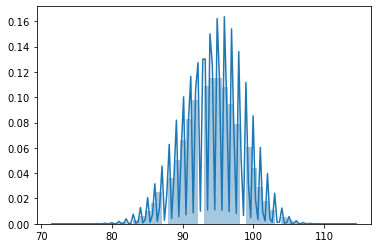

In [101]:
sns.distplot(flip_distribution)

In [106]:
pvalue =  len([1 for i in flip_distribution if i <= 93])/10000000

In [107]:
pvalue

0.4247938